# Predictive Modeling of System Failures Using Sensor and Environmental Data

## Project Overview
This project aims to develop a predictive system for forecasting system failures (`fail`) based on sensor readings, environmental conditions, and operational data. The system will provide accurate predictions and actionable insights while ensuring interpretability for regulatory compliance.

## Dataset
The dataset contains the following columns:
- `footfall`: Traffic or usage intensity
- `tempMode`: Operational temperature mode (categorical)
- `AQ`: Air quality index
- `USS`: Ultrasonic sensor reading
- `CS`: Sensor reading or categorical state
- `VOC`: Volatile Organic Compound levels
- `RP`, `IP`: Additional sensor readings
- `Temperature`: Ambient or system temperature
- `fail`: Target variable indicating failure (1 = fail, 0 = no fail)

## Methodology Overview

### 1. Data Preprocessing
- Handle missing values and outliers.
- Encode categorical variables (`tempMode`).
- Scale numerical features for model compatibility.

### 2. Exploratory Data Analysis (EDA)
- Analyze distributions of features and target variable.
- Investigate correlations and feature-target relationships.
- Identify patterns or anomalies in sensor and environmental readings.

### 3. Feature Engineering
- Create derived features and interaction terms.
- Select relevant features using feature importance and statistical methods.

### 4. Model Selection & Training
- Train interpretable models (e.g., Logistic Regression, Decision Tree) for regulatory compliance.
- Train advanced models (e.g., Random Forest, XGBoost, LightGBM) for higher predictive performance.
- Handle class imbalance if needed and optimize hyperparameters using cross-validation.

### 5. Model Evaluation
- Evaluate performance using Accuracy, Precision, Recall, F1-Score, and ROC-AUC.
- Visualize results with confusion matrices and feature importance plots.

### 6. Model Explainability
- Provide global explanations using feature importance and SHAP summary plots.
- Provide local explanations for individual predictions using SHAP waterfall plots or LIME.

### 7. Deployment & Monitoring
- Deploy the model as an API or interactive dashboard for real-time predictions.
- Implement monitoring for model drift and periodic retraining.
- Generate alerts for predicted failures to enable proactive maintenance.

### 8. Innovative Real-World Solution
- Utilize predictions to implement a proactive maintenance system, reducing downtime and improving operational efficiency.

## Summary Workflow
**Data Ingestion → Preprocessing → EDA → Feature Engineering → Modeling & Tuning → Evaluation → Explainability → Deployment & Monitoring → Decision Support**

This notebook will guide the step-by-step process to build an accurate, interpretable, and industry-compliant predictive system.


In [1]:
# ===============================
# Import Required Libraries
# ===============================

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and feature engineering
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb

# Model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Explainability
import shap
import lime
import lime.lime_tabular

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Visualization settings
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)


In [2]:
# ===============================
# Load Dataset and Initial Inspection
# ===============================

# Load the dataset (replace 'data.csv' with your actual file name or path)
df = pd.read_csv("data.csv")

# Display the first 5 rows
print("Preview of dataset:")
display(df.head())

# Check dataset shape (rows, columns)
print("\nDataset Shape:", df.shape)

# Check data types and non-null counts
print("\nDataset Info:")
print(df.info())

# Summary statistics of numerical features
print("\nStatistical Summary:")
display(df.describe().T)

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Preview of dataset:


,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0



Dataset Shape: (944, 10)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB
None

Statistical Summary:


,count,mean,std,min,25%,50%,75%,max
footfall,944.0,306.381356,1082.606745,0.0,1.0,22.0,110.0,7300.0
tempMode,944.0,3.727754,2.677235,0.0,1.0,3.0,7.0,7.0
AQ,944.0,4.325212,1.438436,1.0,3.0,4.0,6.0,7.0
USS,944.0,2.939619,1.383725,1.0,2.0,3.0,4.0,7.0
CS,944.0,5.394068,1.269349,1.0,5.0,6.0,6.0,7.0
VOC,944.0,2.842161,2.273337,0.0,1.0,2.0,5.0,6.0
RP,944.0,47.043432,16.423130,19.0,34.0,44.0,58.0,91.0
IP,944.0,4.565678,1.599287,1.0,3.0,4.0,6.0,7.0
Temperature,944.0,16.331568,5.974781,1.0,14.0,17.0,21.0,24.0
fail,944.0,0.416314,0.493208,0.0,0.0,0.0,1.0,1.0



Missing Values:
footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64


Class counts:
 fail
0    551
1    393
Name: count, dtype: int64

Class percentages (%):
 fail
0    58.37
1    41.63
Name: proportion, dtype: float64

Baseline (predict all = 0) accuracy: 0.584


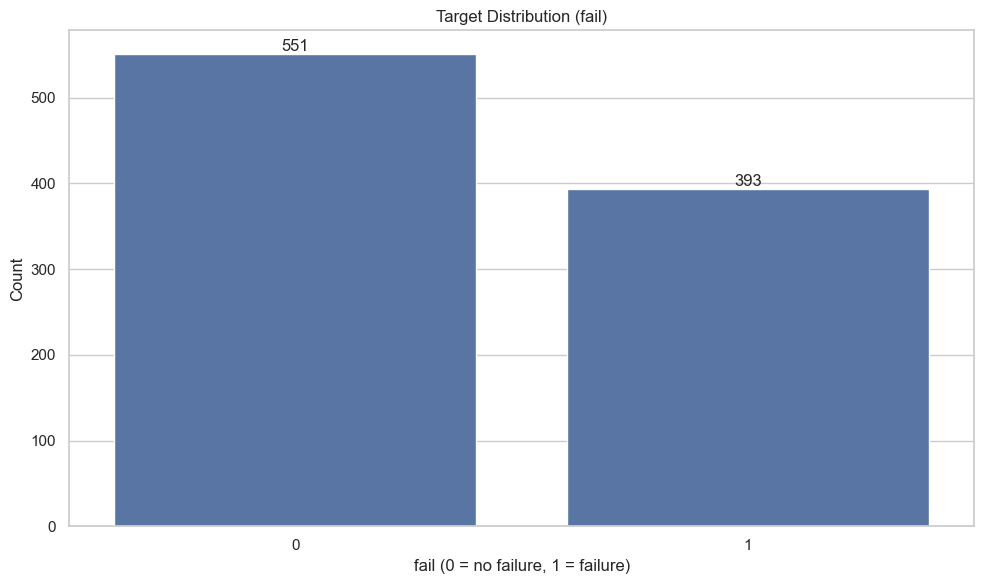


Failure rate by tempMode:


,fail_rate
tempMode,
6,0.593750
2,0.473214
1,0.460000
4,0.439394
0,0.416149
7,0.402778
5,0.380952
3,0.306931


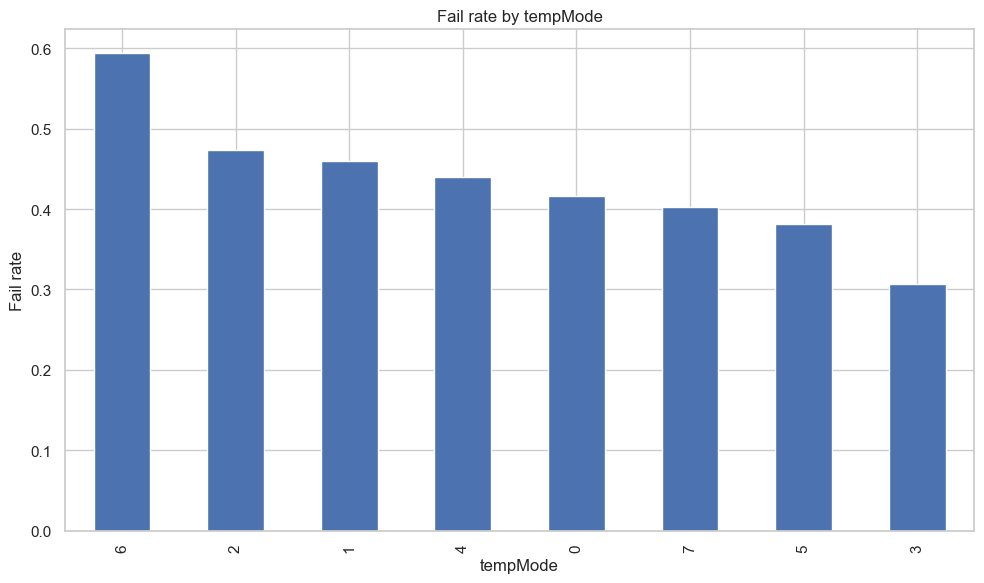


Pearson correlation with 'fail':


,r
VOC,0.797329
AQ,0.583238
USS,-0.466574
Temperature,0.190257
IP,0.085624
footfall,-0.073066
RP,0.053668
CS,0.018855
tempMode,-0.014462


In [3]:
# ===============================
# EDA 1: Target balance & early signals
# ===============================

# Class balance
class_counts = df['fail'].value_counts().sort_index()
class_perc = df['fail'].value_counts(normalize=True).sort_index() * 100

print("Class counts:\n", class_counts)
print("\nClass percentages (%):\n", class_perc.round(2))

# Baseline: always predict the majority class
majority_class = class_counts.idxmax()
baseline_acc = class_counts.max() / len(df)
print(f"\nBaseline (predict all = {majority_class}) accuracy: {baseline_acc:.3f}")

# Plot target distribution
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
sns.countplot(x='fail', data=df, ax=ax)
ax.set_title('Target Distribution (fail)')
ax.set_xlabel('fail (0 = no failure, 1 = failure)')
ax.set_ylabel('Count')
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.show()

# Failure rate by tempMode (treating tempMode as categorical)
if 'tempMode' in df.columns:
    temp_fail_rate = df.groupby('tempMode')['fail'].mean().sort_values(ascending=False)
    print("\nFailure rate by tempMode:")
    display(temp_fail_rate.to_frame('fail_rate'))

    fig, ax = plt.subplots()
    temp_fail_rate.plot(kind='bar', ax=ax)
    ax.set_ylabel('Fail rate')
    ax.set_title('Fail rate by tempMode')
    plt.tight_layout()
    plt.show()

# Pearson correlation of features with target
num_feats = [c for c in df.columns if c != 'fail']
corr_with_target = df[num_feats + ['fail']].corr()['fail'].drop('fail').sort_values(key=lambda s: s.abs(), ascending=False)

print("\nPearson correlation with 'fail':")
display(corr_with_target.to_frame('r'))


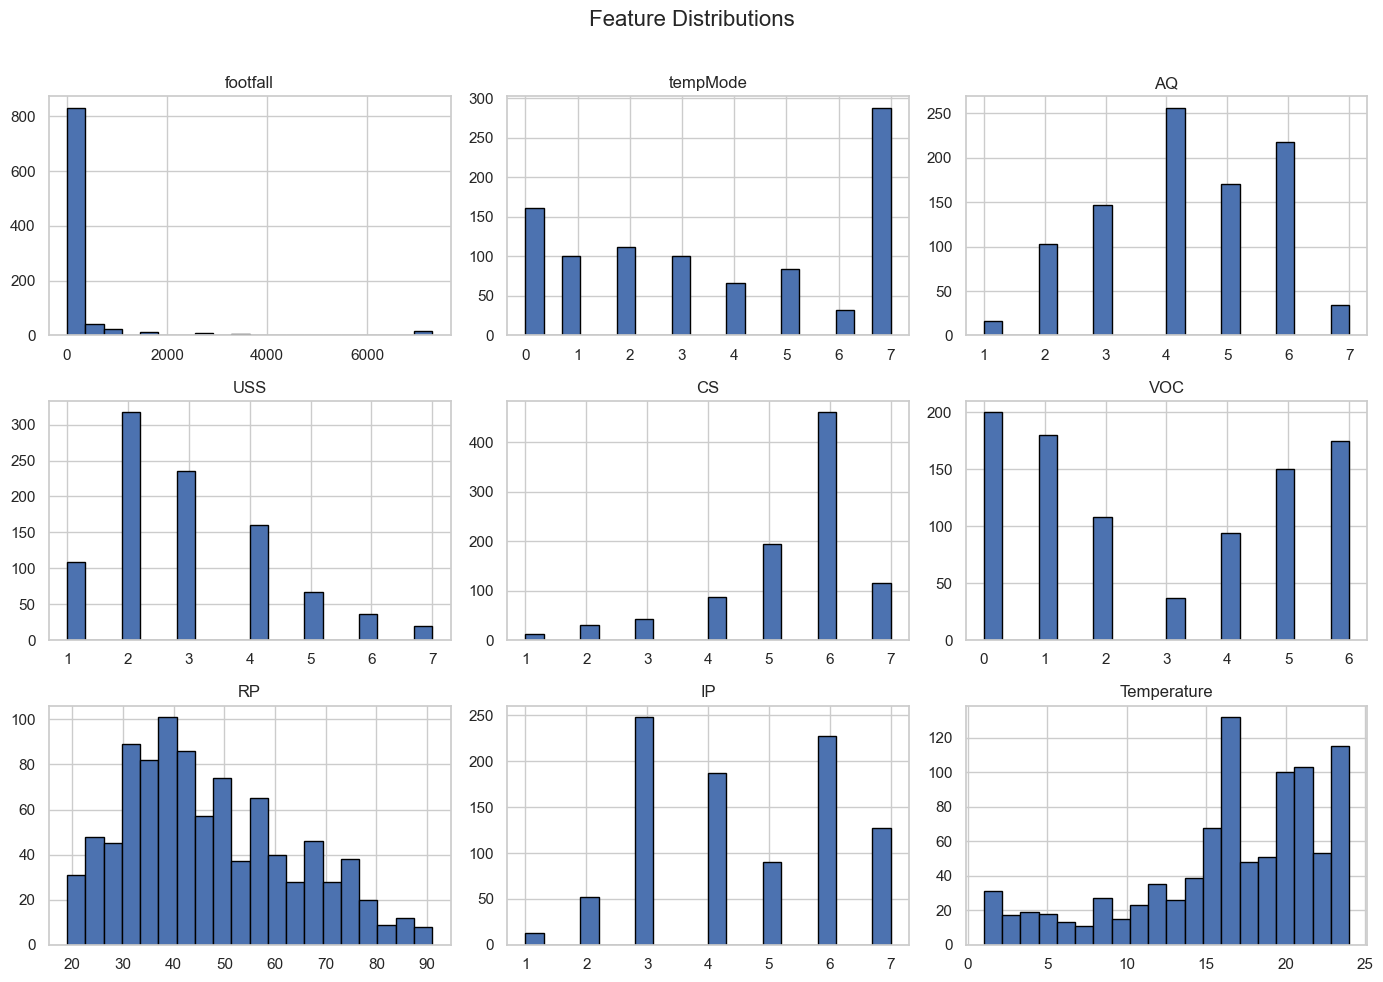

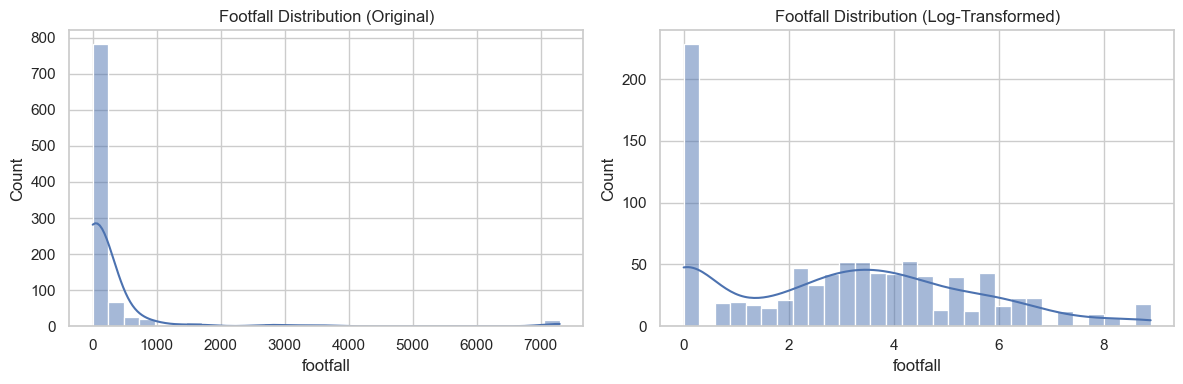

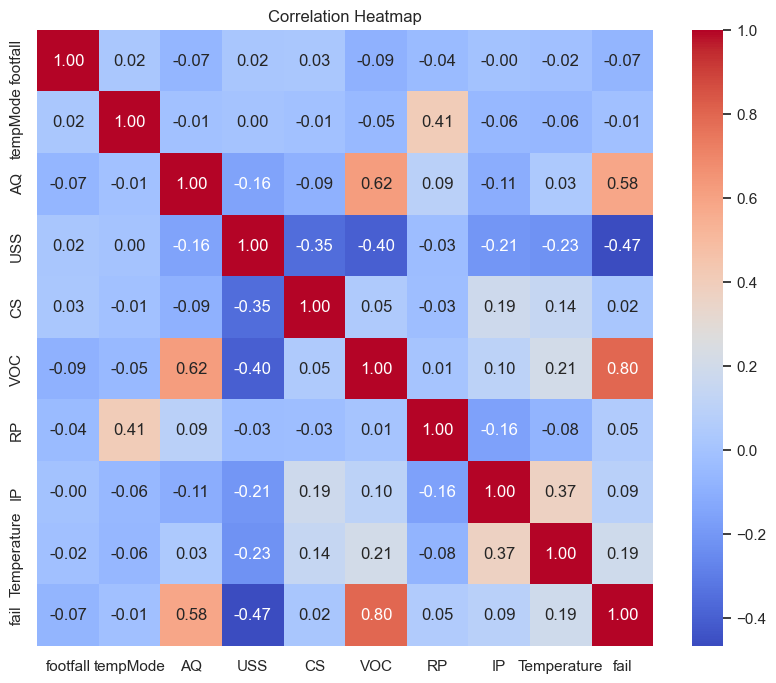

Highly correlated feature pairs (|r| > 0.7):


,level_0,level_1,correlation
38,VOC,fail,0.797329


In [4]:
# ===============================
# EDA 2: Feature distributions & correlation structure
# ===============================

# Plot histograms for numeric features
df[num_feats].hist(bins=20, figsize=(14, 10), edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# Focus on 'footfall' since it has a long-tailed distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['footfall'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Footfall Distribution (Original)')

# Apply log1p transform (log(x+1)) to handle zeros
sns.histplot(np.log1p(df['footfall']), bins=30, kde=True, ax=axes[1])
axes[1].set_title('Footfall Distribution (Log-Transformed)')

plt.tight_layout()
plt.show()

# Correlation heatmap (all numerical features including target)
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()

# Highlight potential multicollinearity
high_corr_pairs = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .reset_index()
    .rename(columns={0: 'correlation'})
)
high_corr_pairs = high_corr_pairs[high_corr_pairs['correlation'].abs() > 0.7]

print("Highly correlated feature pairs (|r| > 0.7):")
display(high_corr_pairs)


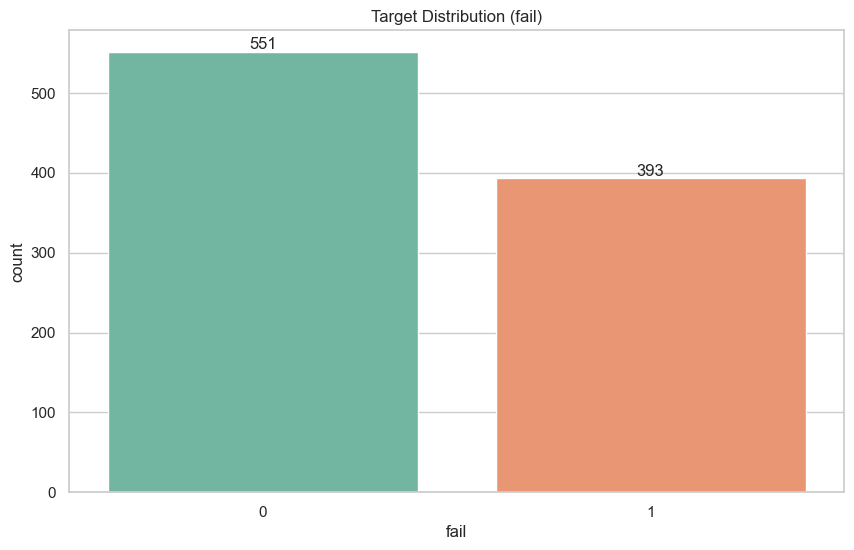

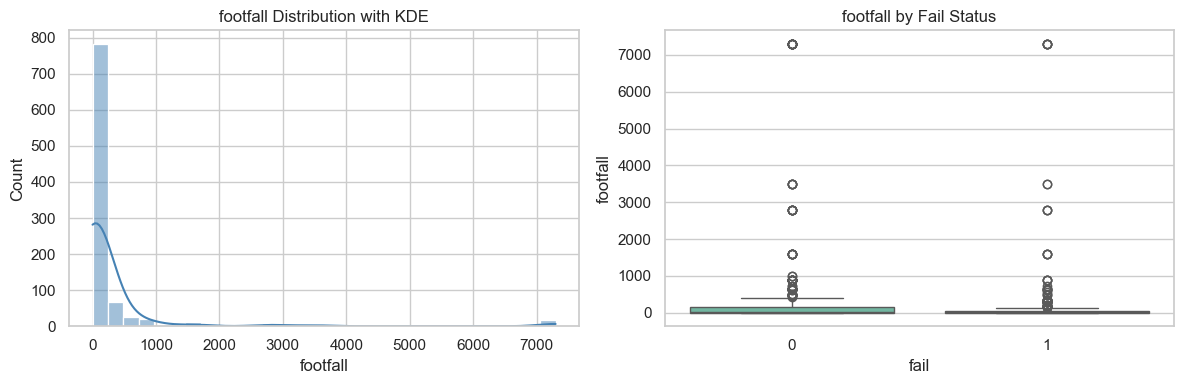

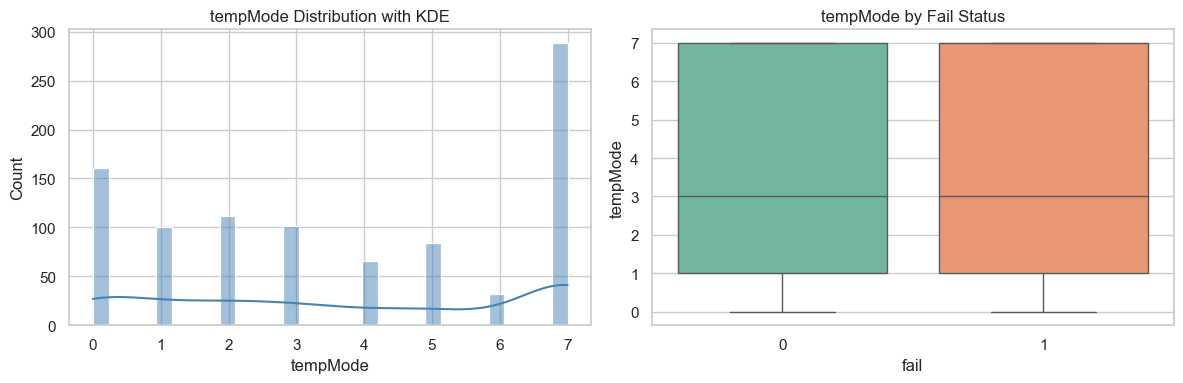

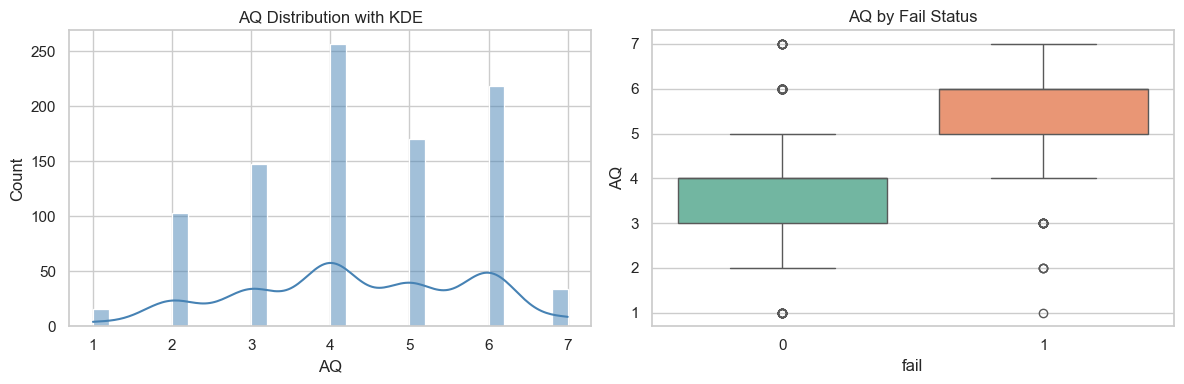

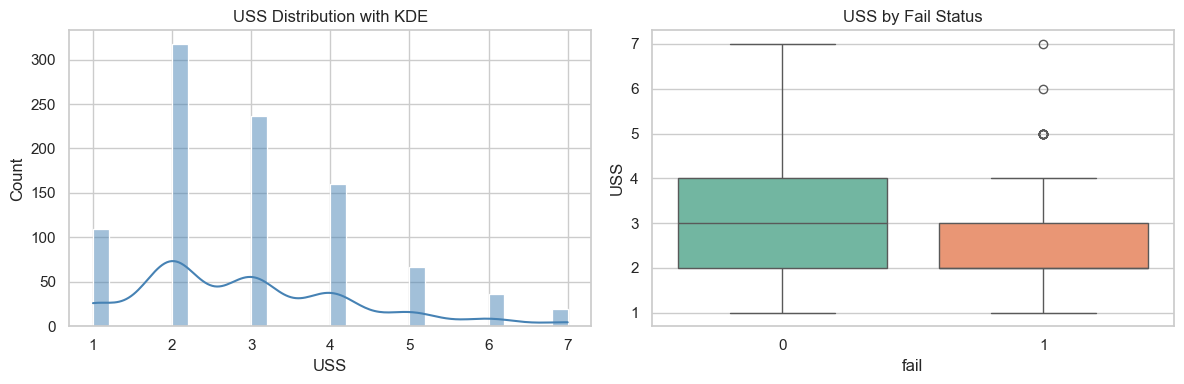

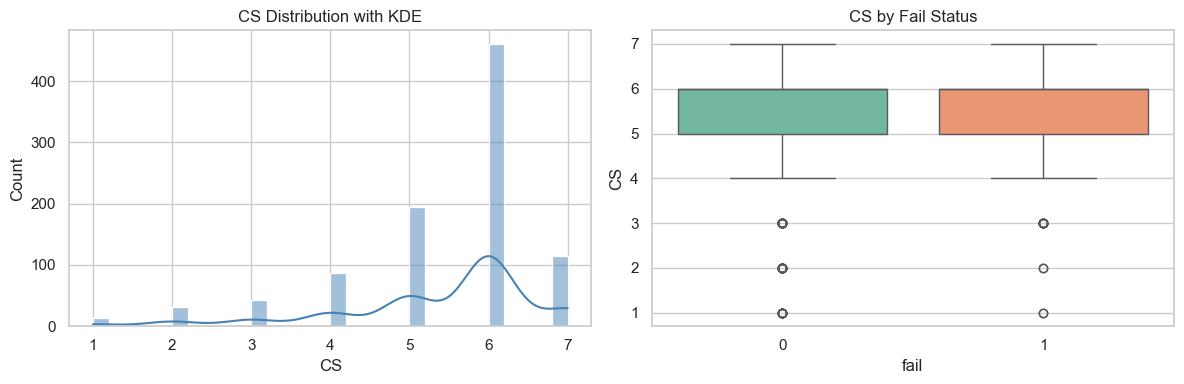

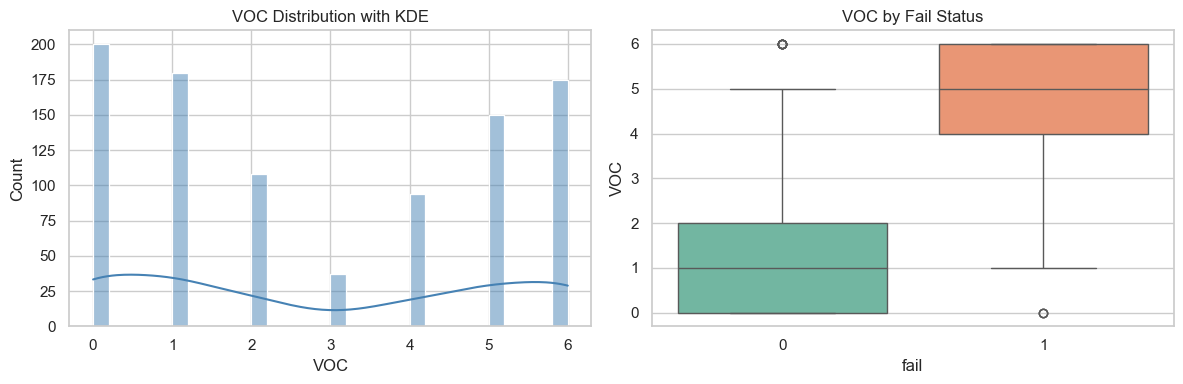

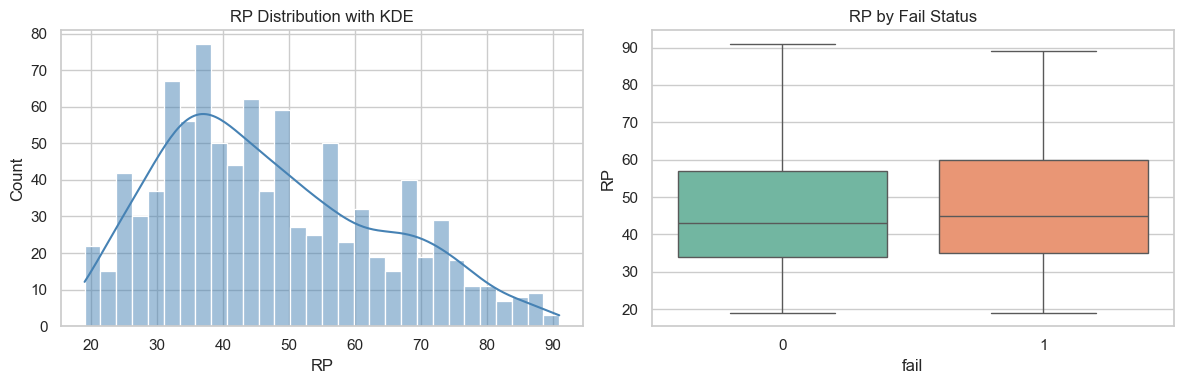

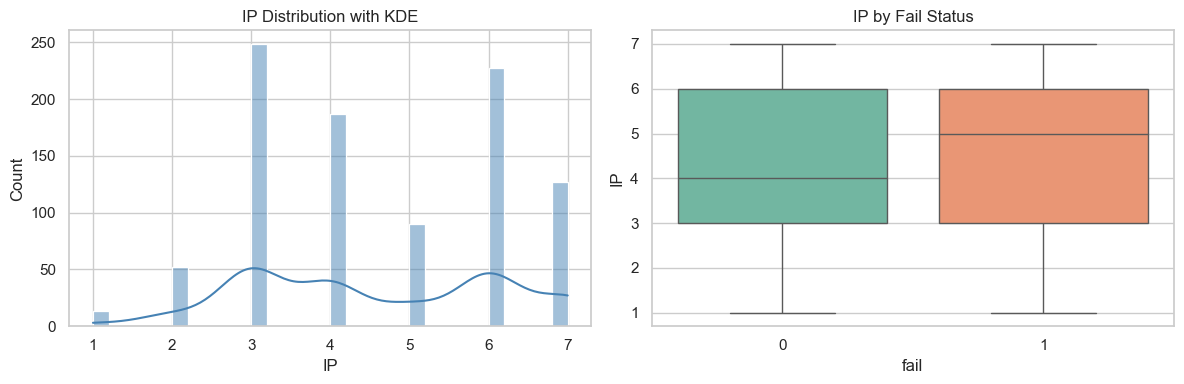

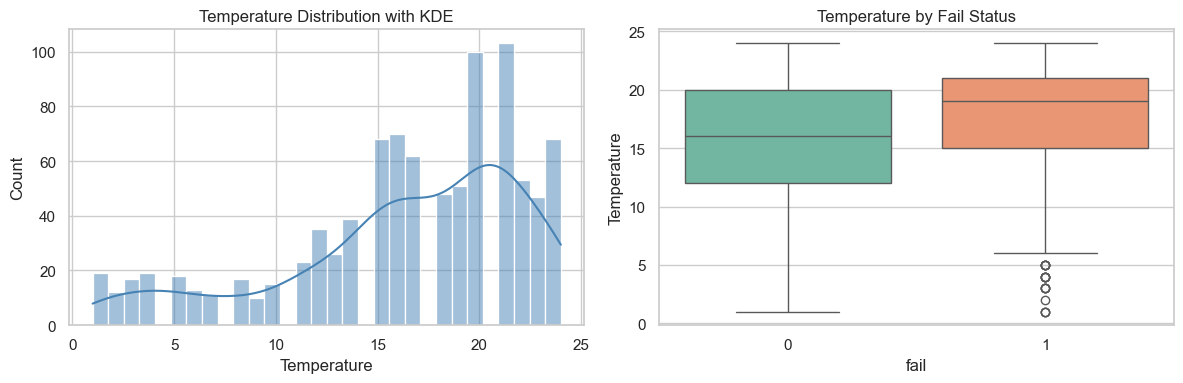

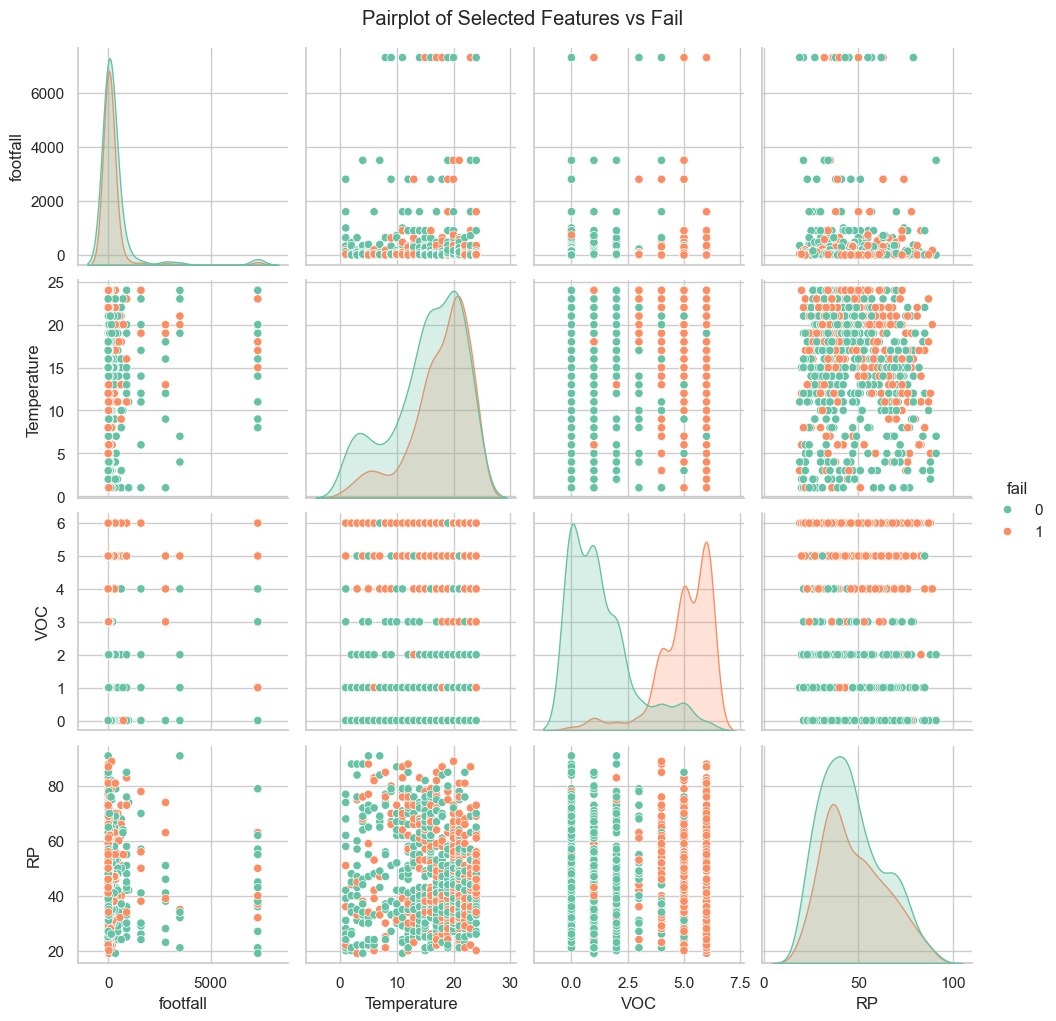

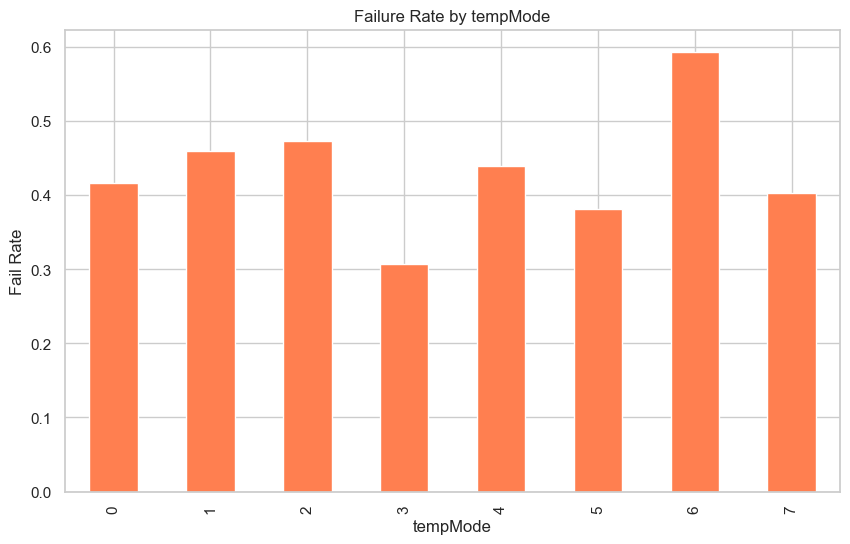

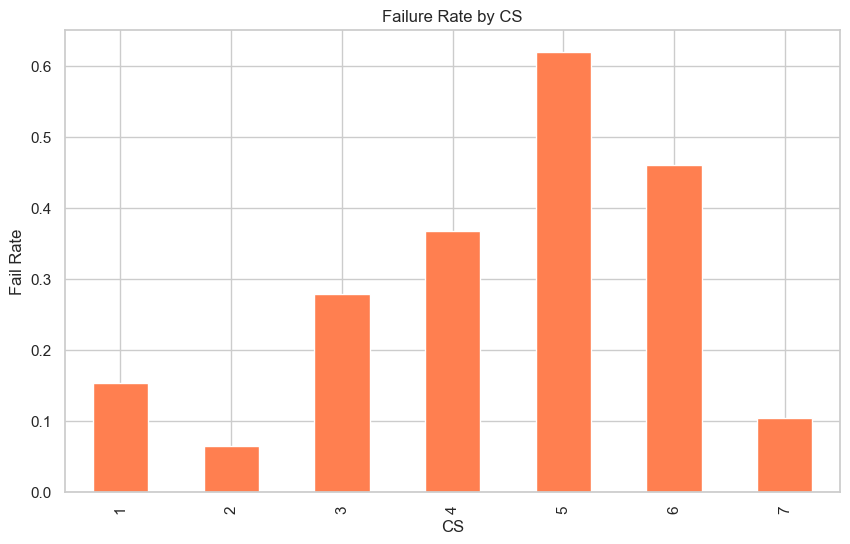

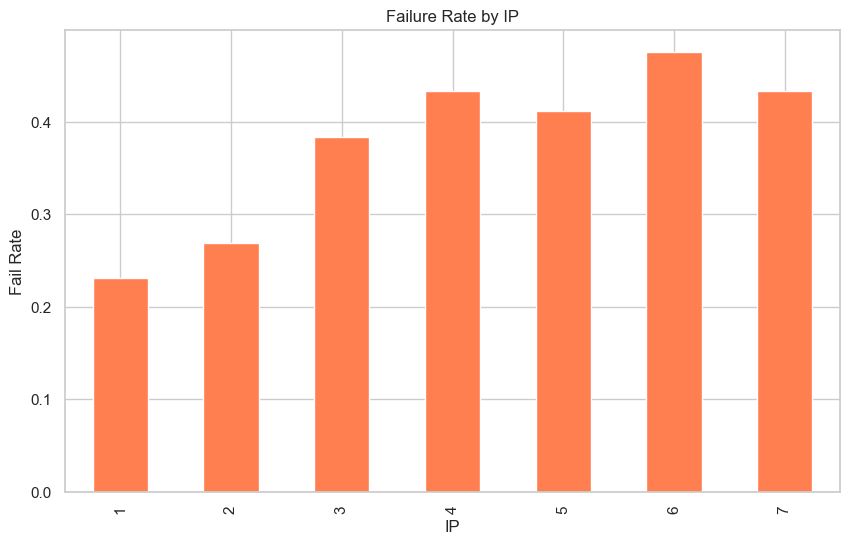

Feature comparison between fail=0 and fail=1 groups:

footfall: mean0=373.15, mean1=212.77, t=2.35, p=0.0187
tempMode: mean0=3.76, mean1=3.68, t=0.44, p=0.6577
AQ: mean0=3.62, mean1=5.32, t=-22.86, p=0.0000
USS: mean0=3.48, mean1=2.18, t=17.01, p=0.0000
CS: mean0=5.37, mean1=5.42, t=-0.62, p=0.5323
VOC: mean0=1.31, mean1=4.99, t=-41.73, p=0.0000
RP: mean0=46.30, mean1=48.09, t=-1.65, p=0.0995
IP: mean0=4.45, mean1=4.73, t=-2.66, p=0.0079
Temperature: mean0=15.37, mean1=17.68, t=-6.14, p=0.0000


In [5]:
# ===============================
# Comprehensive EDA
# ===============================

import scipy.stats as stats

# 1. Target variable distribution (class balance)
fig, ax = plt.subplots()
sns.countplot(x='fail', data=df, ax=ax, palette="Set2")
ax.set_title("Target Distribution (fail)")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# 2. Univariate distributions with KDE and Boxplots
for col in num_feats:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df[col], bins=30, kde=True, ax=axes[0], color="steelblue")
    axes[0].set_title(f"{col} Distribution with KDE")
    
    sns.boxplot(x='fail', y=col, data=df, ax=axes[1], palette="Set2")
    axes[1].set_title(f"{col} by Fail Status")
    plt.tight_layout()
    plt.show()

# 3. Pairwise scatterplot (subset to avoid clutter)
subset_features = ['footfall', 'Temperature', 'VOC', 'RP', 'fail']
sns.pairplot(df[subset_features], hue="fail", diag_kind="kde", palette="Set2")
plt.suptitle("Pairplot of Selected Features vs Fail", y=1.02)
plt.show()

# 4. Failure rate by categorical / discrete features (like tempMode, CS, IP)
cat_like = ['tempMode', 'CS', 'IP']
for col in cat_like:
    rate = df.groupby(col)['fail'].mean()
    fig, ax = plt.subplots()
    rate.plot(kind='bar', ax=ax, color="coral")
    ax.set_title(f"Failure Rate by {col}")
    ax.set_ylabel("Fail Rate")
    plt.show()

# 5. Statistical comparison between fail=0 and fail=1 groups
print("Feature comparison between fail=0 and fail=1 groups:\n")
for col in num_feats:
    group0 = df[df['fail'] == 0][col]
    group1 = df[df['fail'] == 1][col]
    
    # Independent t-test
    t_stat, p_val = stats.ttest_ind(group0, group1, equal_var=False)
    print(f"{col}: mean0={group0.mean():.2f}, mean1={group1.mean():.2f}, t={t_stat:.2f}, p={p_val:.4f}")


In [6]:
# ===============================
# Step: Preprocessing & Feature Engineering
# ===============================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Features and target
X = df.drop("fail", axis=1)
y = df["fail"]

# Identify categorical-like and numerical features
categorical_features = ['tempMode', 'CS', 'IP']   # Treat as categorical
numerical_features = [col for col in X.columns if col not in categorical_features]

# Optional: Apply log1p transformation to skewed 'footfall'
X['footfall_log'] = np.log1p(X['footfall'])
numerical_features = [col if col != 'footfall' else 'footfall_log' for col in numerical_features]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Preprocessing: scaling numeric, one-hot encoding categorical
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

print("Preprocessing pipeline defined successfully!")
print("Numerical features:", numerical_features)
print("Categorical features:", categorical_features)


Preprocessing pipeline defined successfully!
Numerical features: ['footfall_log', 'AQ', 'USS', 'VOC', 'RP', 'Temperature']
Categorical features: ['tempMode', 'CS', 'IP']


In [7]:
# ===============================
# Step: Baseline Models (Fixed Evaluation)
# ===============================

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Logistic Regression pipeline
log_reg_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42))
])

# Decision Tree pipeline
dt_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(max_depth=5, class_weight="balanced", random_state=42))
])

# Train both models
log_reg_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_log = log_reg_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)

# Evaluation function (fixed rounding)
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Performance on Test Set:")
    print("Accuracy:", round(accuracy_score(y_true, y_pred), 3))
    print("Precision:", round(precision_score(y_true, y_pred), 3))
    print("Recall:", round(recall_score(y_true, y_pred), 3))
    print("F1 Score:", round(f1_score(y_true, y_pred), 3))
    print("ROC-AUC:", round(roc_auc_score(y_true, y_pred), 3))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

# Evaluate models
evaluate_model("Logistic Regression", y_test, y_pred_log)
evaluate_model("Decision Tree", y_test, y_pred_dt)



Logistic Regression Performance on Test Set:
Accuracy: 0.921
Precision: 0.881
Recall: 0.937
F1 Score: 0.908
ROC-AUC: 0.923

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       110
           1       0.88      0.94      0.91        79

    accuracy                           0.92       189
   macro avg       0.92      0.92      0.92       189
weighted avg       0.92      0.92      0.92       189


Decision Tree Performance on Test Set:
Accuracy: 0.905
Precision: 0.859
Recall: 0.924
F1 Score: 0.89
ROC-AUC: 0.907

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.92       110
           1       0.86      0.92      0.89        79

    accuracy                           0.90       189
   macro avg       0.90      0.91      0.90       189
weighted avg       0.91      0.90      0.91       189



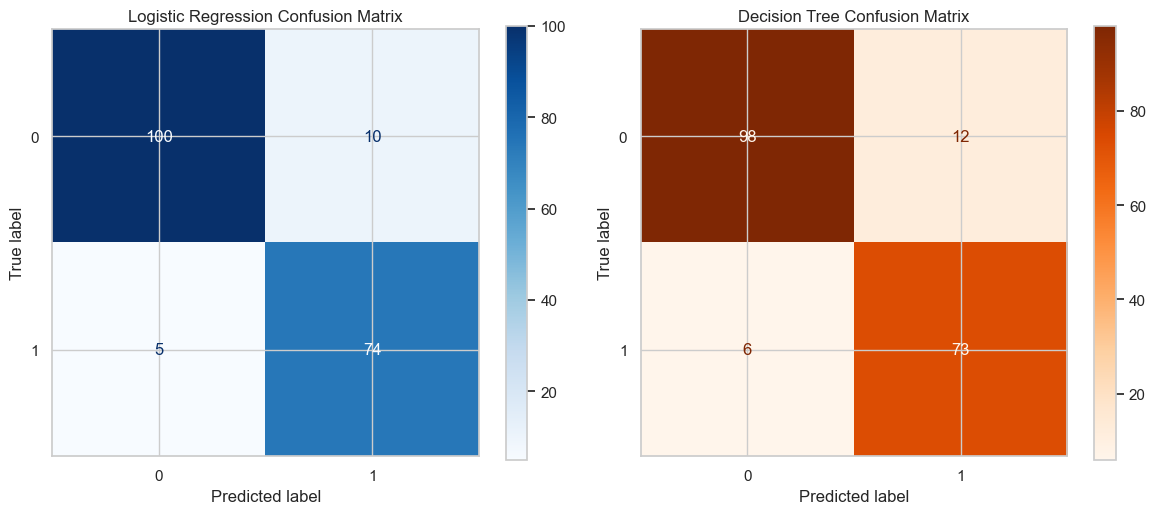


Logistic Regression Feature Importance (Coefficients):


,Feature,Coefficient
3,VOC,2.104014
20,CS_7,-1.977749
2,USS,-1.161043
1,AQ,0.865773
16,CS_3,0.829445
17,CS_4,0.570472
7,tempMode_1,-0.462767
18,CS_5,0.457965
8,tempMode_2,0.456912
14,CS_1,0.412331



Decision Tree Feature Importance:


,Feature,Importance
3,VOC,0.846853
2,USS,0.038647
5,Temperature,0.030986
0,footfall_log,0.025533
1,AQ,0.018650
18,CS_5,0.014481
8,tempMode_2,0.010701
17,CS_4,0.005415
15,CS_2,0.005230
6,tempMode_0,0.003504


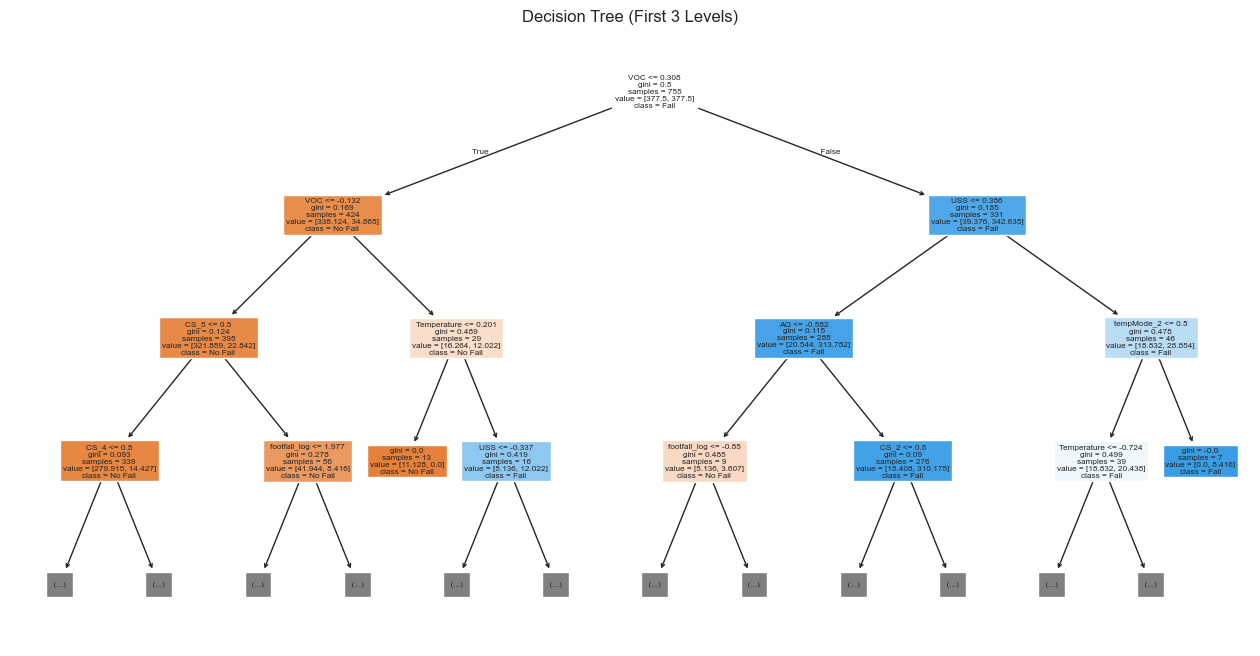

In [8]:
# ===============================
# Step: Model Performance Visualization & Interpretability
# ===============================

from sklearn.metrics import ConfusionMatrixDisplay

# Confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay.from_estimator(log_reg_model, X_test, y_test, ax=axes[0], cmap="Blues")
axes[0].set_title("Logistic Regression Confusion Matrix")

ConfusionMatrixDisplay.from_estimator(dt_model, X_test, y_test, ax=axes[1], cmap="Oranges")
axes[1].set_title("Decision Tree Confusion Matrix")

plt.tight_layout()
plt.show()

# Logistic Regression feature importance (coefficients after preprocessing)
log_reg = log_reg_model.named_steps["classifier"]
# Get feature names from preprocessing
ohe = log_reg_model.named_steps["preprocessor"].named_transformers_["cat"].named_steps["onehot"]
cat_names = ohe.get_feature_names_out(categorical_features)
feature_names = numerical_features + list(cat_names)

coefficients = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": log_reg.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)

print("\nLogistic Regression Feature Importance (Coefficients):")
display(coefficients)

# Decision Tree feature importance
dt = dt_model.named_steps["classifier"]
dt_importances = pd.DataFrame({
    "Feature": feature_names,
    "Importance": dt.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nDecision Tree Feature Importance:")
display(dt_importances)

# Optional: visualize decision tree structure
from sklearn import tree
plt.figure(figsize=(16, 8))
tree.plot_tree(dt, feature_names=feature_names, class_names=["No Fail", "Fail"], filled=True, max_depth=3)
plt.title("Decision Tree (First 3 Levels)")
plt.show()


ExactExplainer explainer: 101it [00:36,  2.72it/s]                                                                     


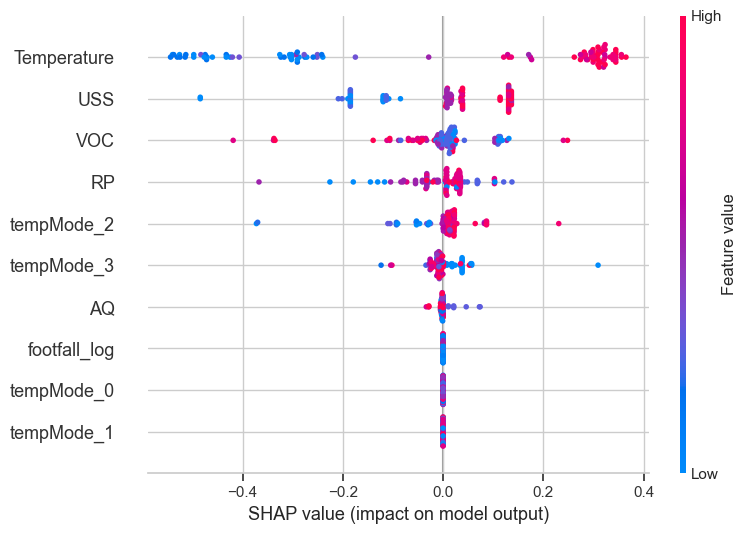

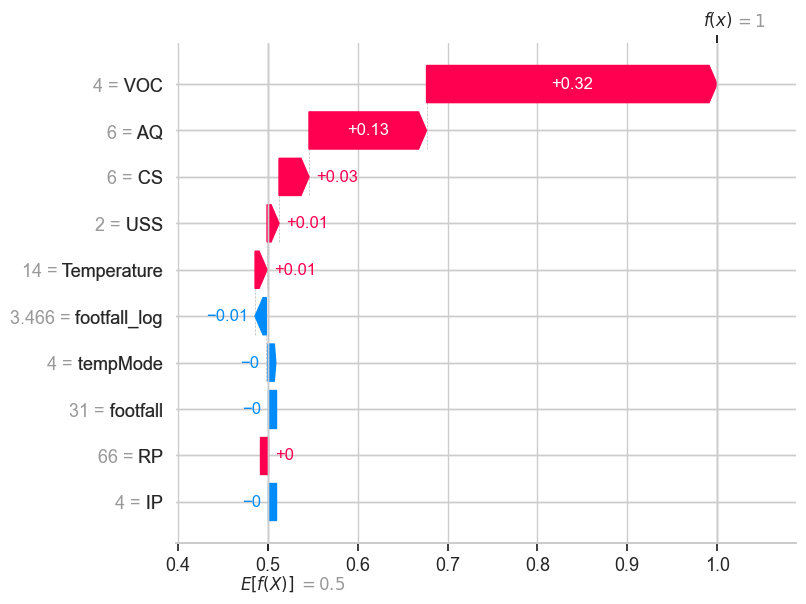

In [9]:
# ======================================
# Decision Tree - SHAP Explainability (Pipeline-Compatible)
# ======================================

import shap
import numpy as np

# Sample for SHAP
X_sample = X_test.sample(100, random_state=42)

# -------------------------------
# Generate feature names after preprocessing
# -------------------------------
ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
cat_feats_preprocessed = ohe.get_feature_names_out(categorical_features)
feature_names_preprocessed = np.concatenate([numerical_features, cat_feats_preprocessed])

# -------------------------------
# Wrap pipeline into a prediction function
# -------------------------------
def dt_pipeline_predict(X):
    return dt_model.predict(X)

# -------------------------------
# SHAP Explainer (pipeline-friendly)
# -------------------------------
explainer = shap.Explainer(dt_pipeline_predict, X_sample, feature_names=feature_names_preprocessed)

# Compute SHAP values
shap_values = explainer(X_sample)

# -------------------------------
# Global SHAP summary
# -------------------------------
shap.summary_plot(shap_values.values, X_sample, feature_names=feature_names_preprocessed)

# -------------------------------
# Local SHAP explanation for first sample
# -------------------------------
shap.plots.waterfall(shap_values[0])


ExactExplainer explainer: 101it [00:14,  2.04it/s]                                                                     


Global SHAP feature importance:


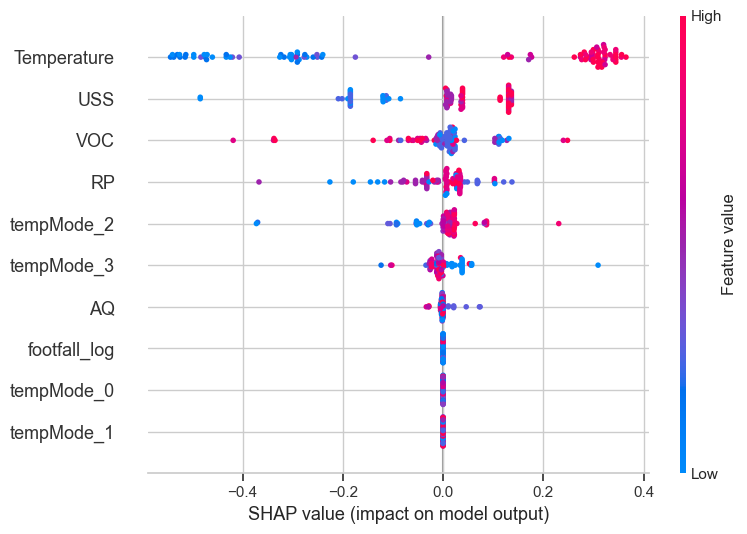

Local SHAP explanation for first sample:


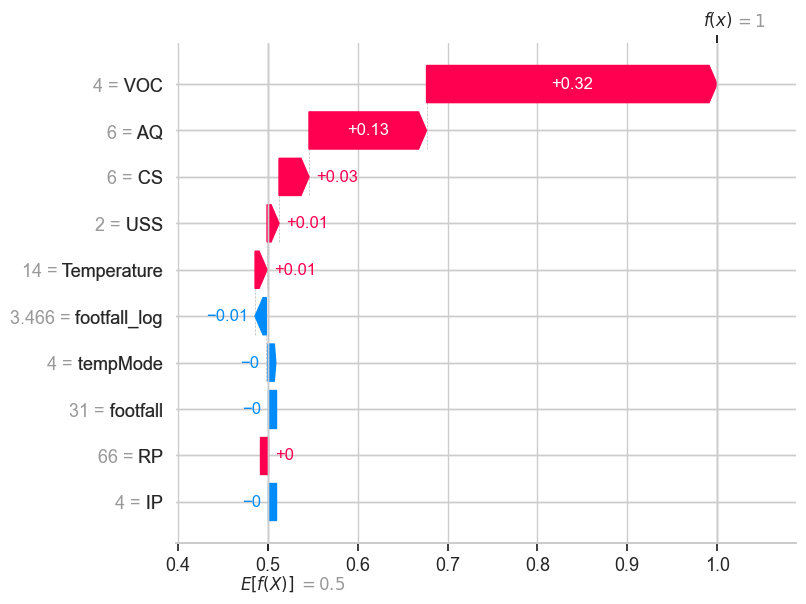

In [10]:
# ======================================
# Generalized SHAP Pipeline for Tree-Based Models
# ======================================

import shap
import numpy as np

# -------------------------------
# Function to generate preprocessed feature names
# -------------------------------
def get_preprocessed_feature_names(preprocessor, numerical_features, categorical_features):
    # Numeric features stay the same
    num_feats = numerical_features
    # One-hot encoded categorical features
    ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
    cat_feats = ohe.get_feature_names_out(categorical_features)
    # Combine
    return np.concatenate([num_feats, cat_feats])

# -------------------------------
# General function for SHAP explainability
# -------------------------------
def shap_tree_pipeline(model_pipeline, X_sample, numerical_features, categorical_features):
    """
    Generates SHAP global and local explanations for a tree-based model inside a pipeline.
    
    Parameters:
        model_pipeline: sklearn pipeline containing preprocessor + tree-based classifier
        X_sample: sample of data (DataFrame)
        numerical_features: list of numeric feature names
        categorical_features: list of categorical feature names
    """
    # Generate correct feature names
    feature_names = get_preprocessed_feature_names(
        model_pipeline.named_steps['preprocessor'],
        numerical_features,
        categorical_features
    )
    
    # Wrap pipeline prediction function
    def pipeline_predict(X):
        return model_pipeline.predict(X)
    
    # Create SHAP Explainer (pipeline-friendly)
    explainer = shap.Explainer(pipeline_predict, X_sample, feature_names=feature_names)
    
    # Compute SHAP values
    shap_values = explainer(X_sample)
    
    # -------------------------------
    # Global SHAP summary plot
    # -------------------------------
    print("Global SHAP feature importance:")
    shap.summary_plot(shap_values.values, X_sample, feature_names=feature_names)
    
    # -------------------------------
    # Local explanation for first sample
    # -------------------------------
    print("Local SHAP explanation for first sample:")
    shap.plots.waterfall(shap_values[0])
    
    return shap_values

# -------------------------------
# Example usage with Decision Tree
# -------------------------------
# Take a sample of data
X_sample = X_test.sample(100, random_state=42)

# Call generalized SHAP function
shap_values_dt = shap_tree_pipeline(
    dt_model, X_sample, numerical_features, categorical_features
)

# -------------------------------
# Example usage with Random Forest / XGBoost / LightGBM
# -------------------------------
# shap_values_rf = shap_tree_pipeline(rf_model, X_sample, numerical_features, categorical_features)
# shap_values_xgb = shap_tree_pipeline(xgb_model, X_sample, numerical_features, categorical_features)
# shap_values_lgb = shap_tree_pipeline(lgb_model, X_sample, numerical_features, categorical_features)


In [11]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# -------------------------------
# 1. Random Forest Pipeline
# -------------------------------
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train
rf_pipeline.fit(X_train, y_train)

# Predict
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluate
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

print("\nRandom Forest Performance on Test Set:")
print(f"Accuracy: {accuracy_rf:.3f}")
print(f"Precision: {precision_rf:.3f}")
print(f"Recall: {recall_rf:.3f}")
print(f"F1 Score: {f1_rf:.3f}")
print(f"ROC-AUC: {roc_auc_rf:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


# -------------------------------
# 2. XGBoost Pipeline
# -------------------------------
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Train
xgb_pipeline.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_pipeline.predict(X_test)

# Evaluate
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb)

print("\nXGBoost Performance on Test Set:")
print(f"Accuracy: {accuracy_xgb:.3f}")
print(f"Precision: {precision_xgb:.3f}")
print(f"Recall: {recall_xgb:.3f}")
print(f"F1 Score: {f1_xgb:.3f}")
print(f"ROC-AUC: {roc_auc_xgb:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


# -------------------------------
# 3. LightGBM Pipeline
# -------------------------------
lgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(random_state=42))
])

# Train
lgb_pipeline.fit(X_train, y_train)

# Predict
y_pred_lgb = lgb_pipeline.predict(X_test)

# Evaluate
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
precision_lgb = precision_score(y_test, y_pred_lgb)
recall_lgb = recall_score(y_test, y_pred_lgb)
f1_lgb = f1_score(y_test, y_pred_lgb)
roc_auc_lgb = roc_auc_score(y_test, y_pred_lgb)

print("\nLightGBM Performance on Test Set:")
print(f"Accuracy: {accuracy_lgb:.3f}")
print(f"Precision: {precision_lgb:.3f}")
print(f"Recall: {recall_lgb:.3f}")
print(f"F1 Score: {f1_lgb:.3f}")
print(f"ROC-AUC: {roc_auc_lgb:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_lgb))



Random Forest Performance on Test Set:
Accuracy: 0.915
Precision: 0.899
Recall: 0.899
F1 Score: 0.899
ROC-AUC: 0.913

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       110
           1       0.90      0.90      0.90        79

    accuracy                           0.92       189
   macro avg       0.91      0.91      0.91       189
weighted avg       0.92      0.92      0.92       189


XGBoost Performance on Test Set:
Accuracy: 0.915
Precision: 0.889
Recall: 0.911
F1 Score: 0.900
ROC-AUC: 0.915

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       110
           1       0.89      0.91      0.90        79

    accuracy                           0.92       189
   macro avg       0.91      0.91      0.91       189
weighted avg       0.92      0.92      0.92       189

[LightGBM] [Info] Number of positive: 314, number of negative: 441

In [12]:
import joblib
from sklearn.pipeline import Pipeline

# Combine preprocessor and logistic regression classifier into a pipeline
best_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', log_reg_model)  # This is your trained Logistic Regression
])

# Save the pipeline
model_filename = "best_model_logistic_regression_pipeline.joblib"
joblib.dump(best_pipeline, model_filename)

print(f"Best model pipeline saved as '{model_filename}'")


Best model pipeline saved as 'best_model_logistic_regression_pipeline.joblib'


In [17]:
import joblib

# Assume 'best_pipeline' is your trained pipeline that handles 'footfall_log'
joblib.dump(best_pipeline, "pipeline_with_footfall_log.joblib")
print("Pipeline saved successfully!")


Pipeline saved successfully!
